# Solve Black-Scholes PDE by numeric methods

## Not finished

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

To solve PDE
$$ rF = F_t + rF_SS + \frac{1}{2}F_{SS}\sigma^2 $$
Where $S(t)$ follows GBM:
$$ dS = \mu Sdt + \sigma SdW(t)$$

Let $F$ be the price of call option s.t. $F(S, t) = \max(0, S(t) - K)$

Let $\Delta = S(t)/K$, $r = 0.04$, $\sigma = 0.5$ and $T - t = 1$

The Black-Scholes equations gives
$$ F(S, t) =  S(t)N(d_1) + Ke^{-r(T-t)}N(d_2)$$
where
$$ d_1 = \frac{\log(\Delta) + (r - \frac{1}{2}\sigma^2)(T-t)}{\sigma\sqrt{T-t}}$$
and $d_2 = d_1 - \sigma\sqrt{T-t}$

In [9]:
def bs_call(delta, t, r, sigma):
    d1 = (np.log(delta) + (r - 0.5*sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return delta * stats.norm.cdf(d1) - np.exp(-r * t) * stats.norm.cdf(d2)

In [12]:
delta = 1.05
r = 0.04
sigma = 0.1
t = 1

In [13]:
bs_call(delta, t, r, sigma)

0.09937286272137114

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
xdata = np.arange(0, 2, 0.01)
ydata = np.arange(0.01, 2.01, 0.01)
sol_set = pd.DataFrame(np.nan, index=xdata, columns=ydata)
for i in xdata:
    for j in ydata:
        sol_set.loc[i, j] = bs_call(j, i, r, sigma)

Text(0.5, 0, 'Call price')

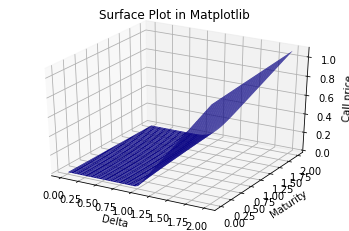

In [17]:
Y, X = np.meshgrid(xdata, ydata)
ax3d = plt.axes(projection='3d')
ax3d.plot_surface(X, Y, sol_set.transpose(), cmap='plasma')
ax3d.set_title('Surface Plot in Matplotlib')
ax3d.set_xlabel('Delta')
ax3d.set_ylabel('Maturity')
ax3d.set_zlabel('Call price')

In [20]:
sol_set

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2.00
0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.910000,0.920000,0.930000,0.940000,0.950000,0.960000,0.970000,0.980000,0.990000,1.000000
0.01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.910400,0.920400,0.930400,0.940400,0.950400,0.960400,0.970400,0.980400,0.990400,1.000400
0.02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.910800,0.920800,0.930800,0.940800,0.950800,0.960800,0.970800,0.980800,0.990800,1.000800
0.03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.911199,0.921199,0.931199,0.941199,0.951199,0.961199,0.971199,0.981199,0.991199,1.001199
0.04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.911599,0.921599,0.931599,0.941599,0.951599,0.961599,0.971599,0.981599,0.991599,1.001599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.95,1.759478e-235,2.089636e-170,2.718828e-137,5.173229e-116,8.983207e-101,3.842007e-89,6.967367e-80,2.736253e-72,6.419860e-66,1.760199e-60,...,0.985036,0.995036,1.005036,1.015036,1.025036,1.035036,1.045036,1.055036,1.065036,1.075036
1.96,2.840341e-234,1.558280e-169,1.367926e-136,2.020789e-115,2.926886e-100,1.089835e-88,1.769881e-79,6.348893e-72,1.380558e-65,3.547282e-60,...,0.985405,0.995405,1.005405,1.015405,1.025405,1.035405,1.045405,1.055405,1.065405,1.075405
1.97,4.457666e-233,1.138613e-168,6.770705e-136,7.785511e-115,9.422947e-100,3.059011e-88,4.453729e-79,1.460640e-71,2.945929e-65,7.098305e-60,...,0.985775,0.995775,1.005775,1.015775,1.025775,1.035775,1.045775,1.055775,1.065775,1.075775
1.98,6.804254e-232,8.154477e-168,3.297644e-135,2.959038e-114,2.998147e-99,8.497442e-88,1.110374e-78,3.332330e-71,6.238488e-65,1.410539e-59,...,0.986145,0.996145,1.006145,1.016145,1.026145,1.036145,1.046145,1.056145,1.066145,1.076145


Numeric solution is to calculate the surface represented by $F$ directly.

In a small interval of time, $F$ satisfies:
$$ \frac{\Delta F}{\Delta t} + rS\frac{\Delta F}{\Delta S} + \frac{1}{2}\sigma^2S^2\frac{\Delta^2 F}{\Delta S^2} = rF$$
The boundary conditions are:
$$ F(S(T), T) = \max(0, S(T) - K) $$
and $ F(0, t) = 0 $ or $ F(S_{\max}, t) = S_{\max} - Ke^{-r(T-t)}$ for $t$ close to $T$

In [18]:
num_set = pd.DataFrame(np.nan, index=xdata, columns=ydata)
b1 = [max(x - k, 0) for x in ydata]
num_set.loc[0.0] = b1

In [19]:
# Steal result from analytical solution
num_set[ydata[-1]] = sol_set[ydata[-1]]
num_set[ydata[0]] = sol_set[ydata[0]]

In [24]:
for i in np.arange(1, len(xdata)):
    for j in np.arange(1, len(ydata) - 1):
        s = ydata[j]
        dfds = r * s * (num_set.iloc[i-1, j] - num_set.iloc[i-1, j-1]) / 0.01
        dfds2 = 0.5 * sigma**2 * s**2 * (num_set.iloc[i-1, j-1] + num_set.iloc[i-1, j+1] - 2 * num_set.iloc[i-1, j]) / (0.01**2)
        num_set.iloc[i, j] = (-num_set.iloc[i-1, j] / 0.01 + dfds + dfds2) / r


In [25]:
num_set

,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10,...,1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2.00
0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
0.01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.950125e+03,1.000400
0.02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,2.425809e+07,-6.039276e+07,1.000800
0.03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.176790e+11,-5.895504e+11,8.521204e+11,1.001199
0.04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.650946e+14,-4.272748e+15,1.186453e+16,-1.319796e+16,1.001599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.95,1.759478e-235,3.806756e-151,1.345517e-152,2.489701e-154,inf,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.075036
1.96,2.840341e-234,-9.513015e-148,-3.434133e-149,inf,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.075405
1.97,4.457666e-233,2.377285e-144,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.075775
1.98,6.804254e-232,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.076145


Text(0.5, 0, 'Call price')

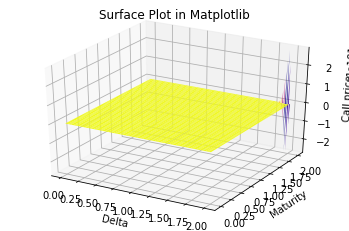

In [23]:
Y, X = np.meshgrid(xdata, ydata)
ax3d = plt.axes(projection='3d')
ax3d.plot_surface(X, Y, num_set.transpose(), cmap='plasma')
ax3d.set_title('Surface Plot in Matplotlib')
ax3d.set_xlabel('Delta')
ax3d.set_ylabel('Maturity')
ax3d.set_zlabel('Call price')